In [1]:
import tensorflow as tf
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib                 # 文件保存为png + 文件读取为png
from collections import Counter  # 数组独特元素统计
import scipy
import math

### 1. 设定全局图像参数：只执行一次！

In [26]:
# 获取原始大图（png）位置：
img_path = glob.glob( r'D:\SGDownload\611_早上\未命名(2)\未命名(2)_大图\待处理png图\原始图件\whole.png' )

# 处理成图像：
img = tf.io.read_file(img_path[0])  # 记得是列表，必须加[0]
img = tf.image.decode_png(img, channels = 3)
img = img.numpy()
img.shape

(14463, 24064, 3)

In [27]:
# 处理为能被256整除的数值：
img1 = img[0:14336,:,:]

In [28]:
# 每个子图计划高、宽（不够自动填补）：公共参数
new_height = 256
new_width = 256
# 获取图像参数：公共参数
(height, width, channel) = img1.shape
row_total = math.ceil( height / new_height )
col_total = math.ceil( width / new_width )

In [29]:
row_total, col_total

(56, 94)

In [30]:
56*94

5264

In [31]:
height / 256

56.0

### 2. 大图分割 + 保存子图：只执行一次！

In [32]:
# 图像分块函数：传入一张原始大图，返回分割后的子图列表
def splitimg(img): 
    # 分割：一行一行分；每行最后一个宽度值较小！
    img_split = [] 
    for x in range(row_total):
        for y in range(col_total):
            if (x != row_total - 1) & (y != col_total - 1):
                tmp = img[x*new_height:(x+1)*new_height, y*new_width:(y+1)*new_width, :]
            else:
                tmp = img[x*new_height:(x+1)*new_height, y*new_width:(y+1)*new_width, :]
            img_split.append(tmp)
    return img_split

# 分块后保存为png文件函数：从左到用，从上到下
def saveimg(img_split):
    # 存储原地址：
    path = 'D:/SGDownload/611_早上/未命名(2)/未命名(2)_大图/待处理png图/81/原图分割后/'
    total = len(img_split)
    # 保存：
    for x in range(total):
        matplotlib.image.imsave( path + 'subimg_{}.png'.format(x), img_split[x] )

In [33]:
# 分割：
img_split = splitimg(img)
# 保存：
saveimg(img_split)

### 3. 将标签处理为2色，并重新保存：每次执行！

In [5]:
def change2(img_path):
    
    img_total = [] # 处理之后的图片！
    
    for x in range( len(img_path) ):   
        img = tf.io.read_file( img_path[x] )
        img = tf.image.decode_png(img, channels = 1)
        img = img.numpy().reshape(256,256)

        result = dict( Counter(img.flatten()) )
        result = sorted(result.items(), key = lambda item:item[1], reverse=True)

        # 选前n个：
        topn = 2
        result = list(result)[0:topn]
        maxtop = []
        for x in range(topn):
            maxtop.append( result[x][0] )

        # 改变：只保留两个，且归为0和1
        img[ (img != maxtop[0]) & (img != maxtop[1]) ] = 255  # 只要不是前两个的，都归为白色
        img[ img == maxtop[0] ] = 0.0  # 环境：
        img[ img == maxtop[1] ] = 1.0  # 沙脊线
        
        # 存：
        img_total.append(img)
    
    return img_total

def resave(img_total, index):
    # 存储新地址：
    path = 'D:/SGDownload/611_早上/未命名(2)/未命名(2)_大图/待处理png图/沙漠数据集12_450/处理后标签1/'  # 每次该“沙漠数据集”后面的数字即可
    total = len(img_total)
    # 保存：
    for x in range(total):
        scipy.misc.imsave( path + 'subimg_{}.png'.format(index[x]), img_total[x] )

In [6]:
img_path = glob.glob( r'D:\SGDownload\611_早上\未命名(2)\未命名(2)_大图\待处理png图\沙漠数据集12_450\标签\*' )  # 图像“标签”原地址
img_path = sorted(img_path, key = lambda x:int(x.split('\\')[-1].split('.')[0].split('_')[-1]) )  # 排序
index = [ int(x.split('\\')[-1].split('.')[0].split('_')[-1]) for x in img_path ]

img_total = change2(img_path)
resave(img_total, index)

E:\Pycharm\python374\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


[0 1]


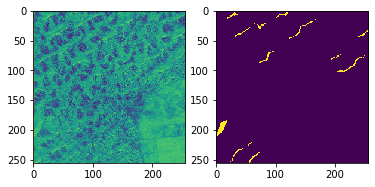

In [15]:
# 测试：
num = 435
label_test_path = glob.glob( 'D:/SGDownload/611_早上/未命名(2)/未命名(2)_大图/待处理png图/沙漠数据集12_450/处理后标签/*' )
img_test_path = glob.glob( 'D:/SGDownload/611_早上/未命名(2)/未命名(2)_大图/待处理png图/沙漠数据集12_450/图像/*' )
# 排序：
img_test_path = sorted(img_test_path, key = lambda x:int(x.split('\\')[-1].split('.')[0].split('_')[-1]) )[num]
label_test_path = sorted(label_test_path, key = lambda x:int(x.split('\\')[-1].split('.')[0].split('_')[-1]) )[num]

label_test = tf.io.read_file( label_test_path )
label_test = tf.image.decode_png( label_test, channels = 1 )
label_test = label_test.numpy().reshape(256,256)

img_test = tf.io.read_file( img_test_path )
img_test = tf.image.decode_png( img_test, channels = 1 )
img_test = img_test.numpy().reshape(256,256)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow( img_test )
plt.subplot(1, 2, 2)
plt.imshow( label_test )

print( np.unique(label_test) )

In [16]:
label_test_path, img_test_path

('D:/SGDownload/611_早上/未命名(2)/未命名(2)_大图/待处理png图/沙漠数据集12_450/处理后标签\\subimg_3572.png',
 'D:/SGDownload/611_早上/未命名(2)/未命名(2)_大图/待处理png图/沙漠数据集12_450/图像\\subimg_3572.png')

### 4. 读取文件并合并为大图：只执行一次！

In [6]:
# 图像拼合函数2：读取子图文件，返回合并后的一张大图
# 输入：无；  输出：一张合并好的图像
# 合并方式：同recoverimg1，只需多生成一个img_split即可
def recoverimg2():
    
    # 所有子图的地址：
    # 地址文件需要排序（提取那个“数值”）：原始的是1, 10, 100 ...
    all_image_path = glob.glob( r'D:\SGDownload\611_早上\未命名(2)\未命名(2)_大图\待处理png图\大图分割后的png\*' )  # 每次改这里！
    all_image_path = sorted(all_image_path, key = lambda x:int(x.split('\\')[-1].split('.')[0].split('_')[-1]) )  # 记得加int!
    total = len(all_image_path)
    
    # 生成img_split
    img_split = [] 
    for x in range(total):
        img = matplotlib.image.imread(all_image_path[x], format = 'PNG')  # 读取文件并解码：返回的是数组！
        img = img[:,:,0:3]    # 最后的一个“透明度”通道去掉
        img_split.append(img)
     
    # 合并：
    # 每行合并：
    img_row = [] 
    for x in range(row_total):
        tmp = np.concatenate( img_split[x*col_total:(x+1)*col_total], axis = 1 )
        img_row.append(tmp)  # 共10行，故共10个合并后的元素  
    # 所有行合并：
    img_recover = np.concatenate(img_row, axis = 0)
    
    return img_recover

In [ ]:
img_recover2 = recoverimg2()

### 5. 特殊处理：全是背景的图像标签

In [2]:
label_path = glob.glob( r'D:\SGDownload\611_早上\未命名(2)\未命名(2)_大图\待处理png图\沙漠数据集12_450\特殊标签\*' )
label_path = sorted(label_path, key = lambda x:int(x.split('\\')[-1].split('.')[0].split('_')[-1]) )  # 排序
index = [ int(x.split('\\')[-1].split('.')[0].split('_')[-1]) for x in label_path ]

In [3]:
def change1(label_path, index):
    label_total = [] # 处理之后的图片！
    
    for x in range( len(label_path) ):   
        # 读取：
        img = tf.io.read_file( label_path[x] )
        img = tf.image.decode_png(img, channels = 1)
        img = img.numpy().reshape(256,256)

        result = dict( Counter(img.flatten()) )
        result = sorted(result.items(), key = lambda item:item[1], reverse=True)

        # 选前1个：只有背景
        topn = 1
        result = list(result)[0:topn]
        maxtop = []
        for x in range(topn):
            maxtop.append( result[x][0] )

        # 改变：只保留两个，且归为0和1
        img[ img != maxtop[0] ] = 255  # 只要不是前两个的，都归为白色
        img[ img == maxtop[0] ] = 0.0  # 环境
        
        # 存：
        label_total.append(img)
    
    return label_total

def resave1(label_total, index):
    # 存储新地址
    path = 'D:/SGDownload/611_早上/未命名(2)/未命名(2)_大图/待处理png图/沙漠数据集12_450/特殊标签/'  # 每次该“沙漠数据集”后面的数字即可
    total = len(label_total)
    print( total )
    # 保存：
    for x in range(total):
        scipy.misc.imsave( path + 'subimg_{}.png'.format(index[x]), label_total[x] )

In [4]:
img_total = change1(label_path, index)
resave1(img_total, index)

6


E:\Pycharm\python374\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


In [20]:
label_test_path = glob.glob( r'D:\SGDownload\611_早上\未命名(2)\未命名(2)_大图\待处理png图\沙漠数据集11_400\特殊标签\*' )

label_test = tf.io.read_file( label_test_path[2] )
label_test = tf.image.decode_png( label_test, channels = 1 )
label_test = label_test.numpy().reshape(256,256)

np.unique( label_test )

array([0], dtype=uint8)